In [ ]:
file_path = "/content/drive/MyDrive/4thProject/data/40percentData/data1.csv"

In [ ]:
import csv

def count_rows(csv_file):
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count


    # Replace 'your_file.csv' with the actual file path


total_rows = count_rows(file_path)

print(f"Total number of rows in the CSV file: {total_rows}")


Total number of rows in the CSV file: 3980


In [ ]:
import csv
  # Download the required data for sentence tokenization
import nltk
nltk.download('punkt')
def calculate_mean_sentence_length(csv_file, column_index):
    total_length = 0
    total_sentences = 0

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Make sure the column_index is within the range of columns in the row
            if column_index < len(row):
                sentences = nltk.sent_tokenize(row[column_index])
                total_length += sum(len(nltk.word_tokenize(sentence)) for sentence in sentences)
                total_sentences += len(sentences)

    if total_sentences == 0:
        return 0  # Avoid division by zero if there are no sentences

    mean_length = total_length / total_sentences
    return mean_length



mean_length = calculate_mean_sentence_length(file_path,1) #1 for column 1

print(f"Mean sentence length in column disf_sentence: {mean_length:.2f} words")


mean_length1 = calculate_mean_sentence_length(file_path,2) #1 for column 2

print(f"Mean sentence length in column flu_sentence: {mean_length1:.2f} words")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mean sentence length in column disf_sentence: 11.24 words
Mean sentence length in column flu_sentence: 9.61 words


In [ ]:
import csv
from collections import Counter

def count_words_in_column(csv_file, column_index):
    word_counter = Counter()

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Make sure the column_index is within the range of columns in the row
            if column_index < len(row):
                words = row[column_index].split()
                word_counter.update(words)

    return word_counter


# Replace 'your_file.csv' with the actual file path and adjust the column index (0-based) as needed
file_path = "/content/drive/MyDrive/4thProject/data/Disf_Data/data1.csv"
column_index =1  # Replace 1 with the column index you want to count words in

result = count_words_in_column(file_path, column_index)
t=-2
for word, count in result.items():
       t=t+int(f"{count}")
print(t)


39690


In [ ]:

column_index =1  # Replace 1 with the column index you want to count words in

result = count_words_in_column(file_path, column_index)
total_word=-2
for word, count in result.items():
       total_word=total_word+int(f"{count}")
print(total_word)

39690


In [ ]:

column_index =2  # Replace 1 with the column index you want to count words in

result = count_words_in_column(file_path, column_index)
flu_word=-2
for word, count in result.items():
       flu_word=flu_word+int(f"{count}")
print(flu_word)

33616


In [ ]:
disf_words=total_word-flu_word
#disf_words
pdisf_words=(disf_words/total_word)*100
pdisf_words

15.303602922650542

In [ ]:
import csv

def count_type_entries(csv_file, type_column_index, target_type):
    type_c_count = 0

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Make sure the type_column_index is within the range of columns in the row
            if type_column_index < len(row):
                entry_type = row[type_column_index]

                # Assuming that the type is an exact match
                if entry_type == target_type:
                    type_c_count += 1

    return type_c_count



type_c_count = count_type_entries(file_path,3,'C')#3 for column no and C for type of disf
type_f_count = count_type_entries(file_path,3,'F')
type_r_count=count_type_entries(file_path,3,'R')
type_fs_count=count_type_entries(file_path,3,'FS')
type_fl_count=count_type_entries(file_path,3,'FL')
print(f"Number of entries with type F: {type_f_count}")
print(f"Number of entries with type R: {type_r_count}")
print(f"Number of entries with type C: {type_c_count}")
print(f"Number of entries with type FS: {type_fs_count}")
print(f"Number of entries with type FL: {type_fl_count}")


Number of entries with type F: 1748
Number of entries with type R: 1064
Number of entries with type C: 391
Number of entries with type FS: 252
Number of entries with type FL: 524


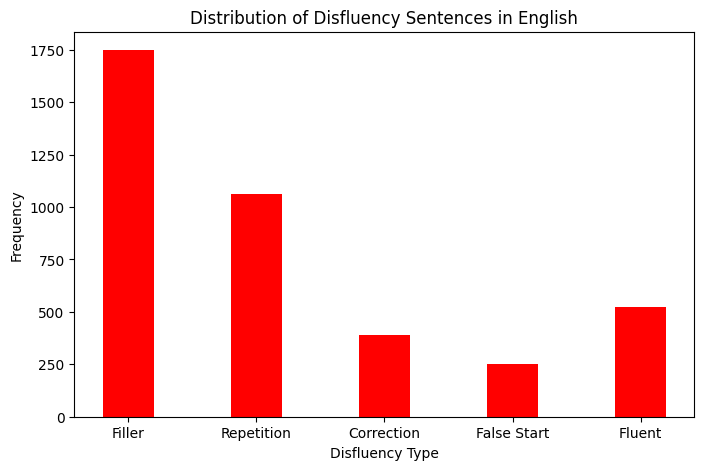

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Filler':type_f_count, 'Repetition':type_r_count, 'Correction':type_c_count,
        'False Start':type_fs_count, 'Fluent':type_fl_count}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)

plt.xlabel("Disfluency Type")
plt.ylabel("Frequency")
plt.title("Distribution of Disfluency Sentences in English")
plt.show()